# **Figures for 7/2 Presentation**

In [1]:
import os
import warnings
warnings.filterwarnings("ignore", message="invalid value encountered in true_divide")
warnings.filterwarnings("ignore", message="Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range")
warnings.filterwarnings("ignore", message="invalid value encountered in reduce")

import xarray as xr
import numpy as np
import math
import pickle as pkl

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import ImageGrid

from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

import cmocean.cm as cmo

from PIL import Image

%load_ext autoreload
%autoreload 2
import hmei.processing as pcs
import hmei.visualization as vis

# Fig Resolution

In [2]:
## increase the resolution of figures in Juypter Notebook

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100
# %matplotlib inline

# Import Data

In [3]:
writedir = '/home/bbuchovecky/storage/so_predict_derived/'
ctrl = 'CTRL/'

In [4]:
writedir = '/home/bbuchovecky/storage/so_predict_derived/'
ctrl = 'CTRL/'

def open_metric(var, metric, reg, time_scale):
    writedir = '/home/bbuchovecky/storage/so_predict_derived/'
    ctrl = 'CTRL/'
    filename = var.lower()+'_ts_'+reg.lower()+'_'+time_scale.lower()+'_'+metric+'.nc'
    return xr.open_dataset(writedir+ctrl+var.upper()+'/'+filename)

In [5]:
sst_so_annual_mean = open_metric('sst', 'mean', 'so', 'annual')
sss_so_annual_mean = open_metric('sss', 'mean', 'so', 'annual')
pco2_so_annual_mean = open_metric('pco2surf', 'mean', 'so', 'annual')
npp_so_annual_mean = open_metric('npp', 'mean', 'so', 'annual')
cn_so_annual_mean = open_metric('cn_inv', 'mean', 'so', 'annual')
sie_so_annual_mean = open_metric('sie', 'mean', 'so', 'annual')
siv_so_annual_mean = open_metric('siv', 'mean', 'so', 'annual')
mld_so_annual_mean = open_metric('mld', 'mean', 'so', 'annual')

In [6]:
sst_so_monthly_anom = open_metric('sst', 'anom', 'so', 'monthly')
sss_so_monthly_anom = open_metric('sss', 'anom', 'so', 'monthly')
pco2_so_monthly_anom = open_metric('pco2surf', 'anom', 'so', 'monthly')
npp_so_monthly_anom = open_metric('npp', 'anom', 'so', 'monthly')
cn_so_monthly_anom = open_metric('cn_inv', 'anom', 'so', 'monthly')
sie_so_monthly_anom = open_metric('sie', 'anom', 'so', 'monthly')
siv_so_monthly_anom = open_metric('siv', 'anom', 'so', 'monthly')
mld_so_monthly_anom = open_metric('mld', 'anom', 'so', 'monthly')

In [7]:
sst_so_monthly_var = open_metric('sst', 'var', 'so', 'monthly')
sss_so_monthly_var = open_metric('sss', 'var', 'so', 'monthly')
pco2_so_monthly_var = open_metric('pco2surf', 'var', 'so', 'monthly')
npp_so_monthly_var = open_metric('npp', 'var', 'so', 'monthly')
cn_so_monthly_var = open_metric('cn_inv', 'var', 'so', 'monthly')
sie_so_monthly_var = open_metric('sie', 'var', 'so', 'monthly')
siv_so_monthly_var = open_metric('siv', 'var', 'so', 'monthly')
mld_so_monthly_var = open_metric('mld', 'var', 'so', 'monthly')

In [8]:
sst_an_mean = xr.open_dataset(writedir+'CTRL/SST/sst_ts_so_annual_mean.nc')
sst_mean = xr.open_dataset(writedir+'CTRL/SST/sst_ts_so_monthly_mean.nc')
sst_anom = xr.open_dataset(writedir+'CTRL/SST/sst_ts_so_monthly_anom.nc')
sst_var = xr.open_dataset(writedir+'CTRL/SST/sst_ts_so_monthly_var.nc')

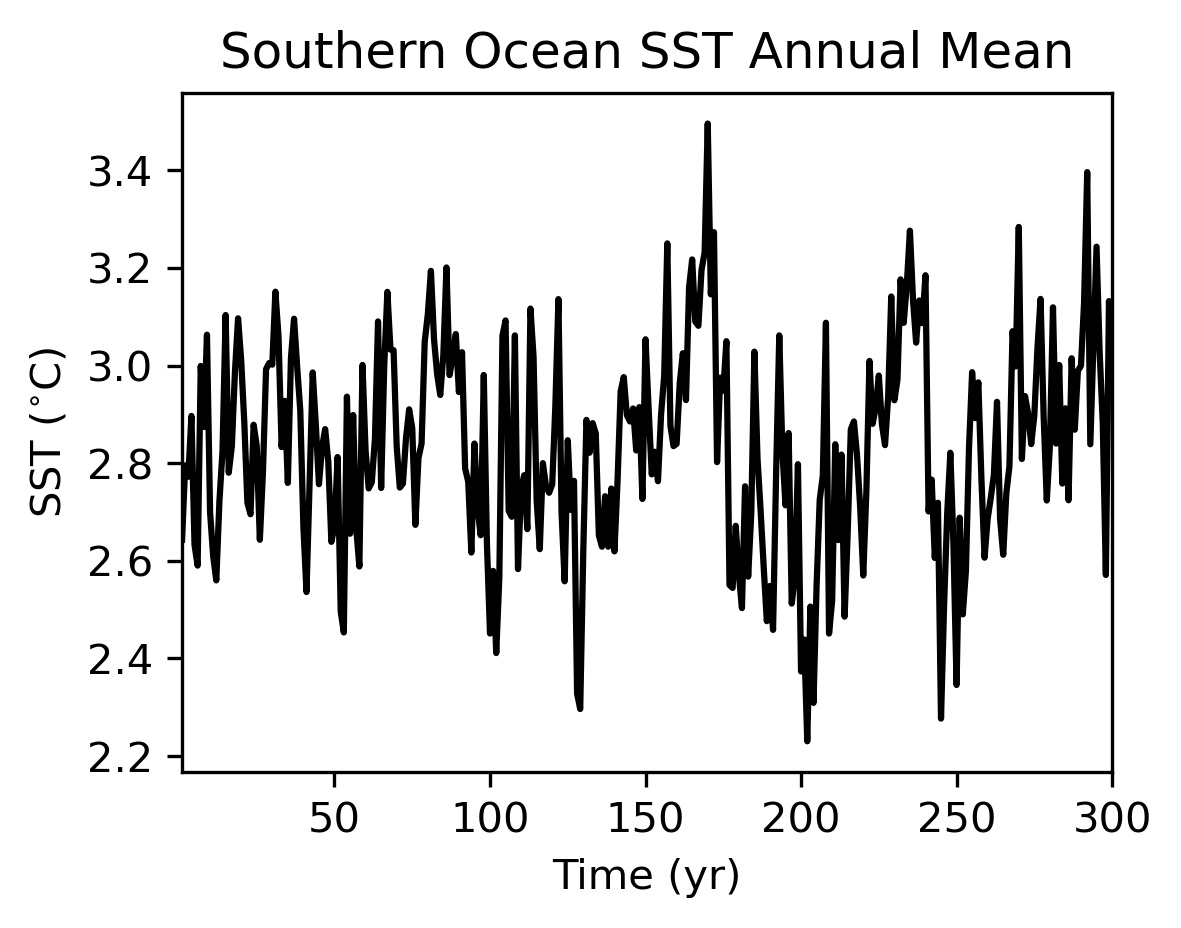

In [9]:
reg = 'SouthernOcean'

fig,ax = plt.subplots(figsize=(4,3))

ax.plot(np.arange(1,301), sst_an_mean[reg], color='black')
ax.set_xlim(1,300)
ax.set(xlabel='Time (yr)', ylabel='SST ($^{\circ}$C)');
ax.set_title('Southern Ocean SST Annual Mean');

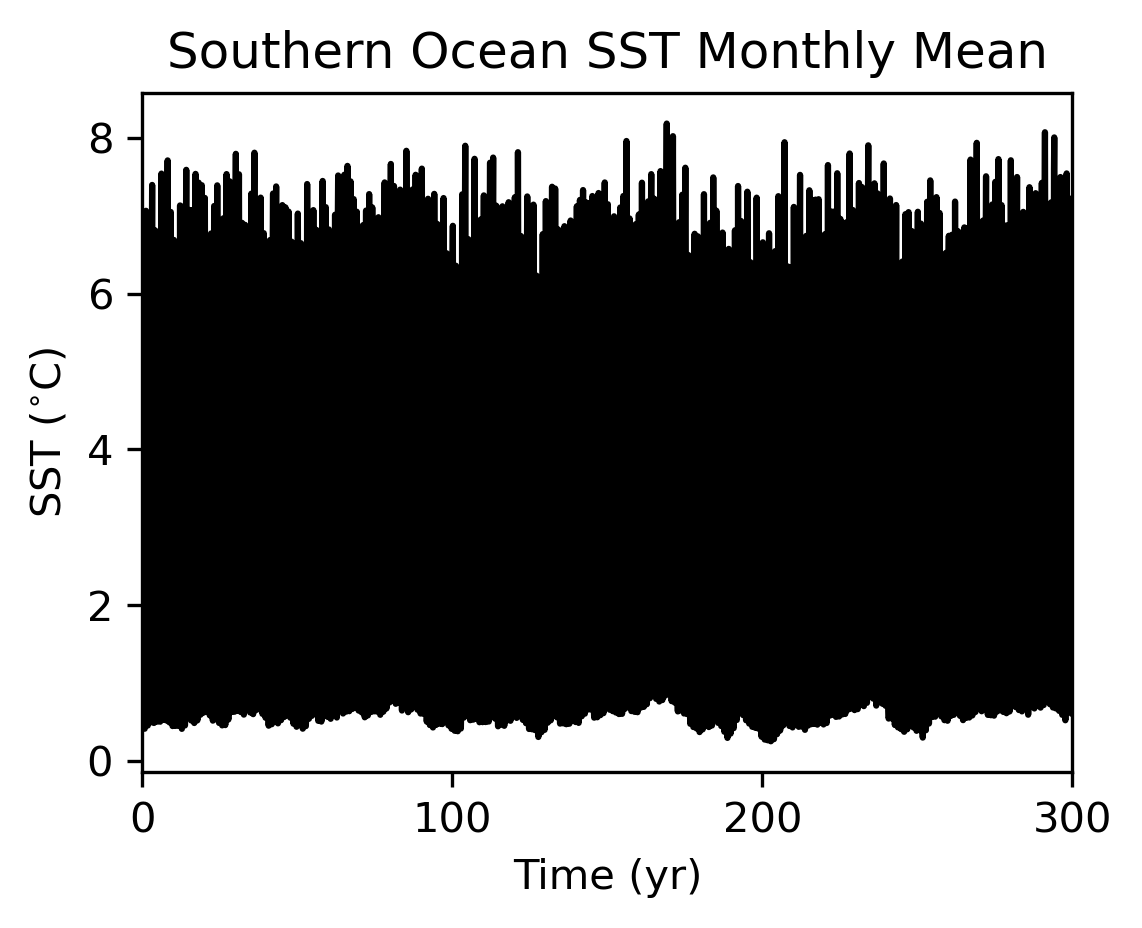

In [10]:
reg = 'SouthernOcean'
yrs = np.array([0,100,200,300])

fig,ax = plt.subplots(figsize=(4,3))

ax.plot(np.arange(1,3601), sst_mean[reg], color='black')
ax.set_xlim(1,3600)
ax.set(xlabel='Time (yr)', ylabel='SST ($^{\circ}$C)', xticks=yrs*12, xticklabels=yrs);
ax.set_title('Southern Ocean SST Monthly Mean');

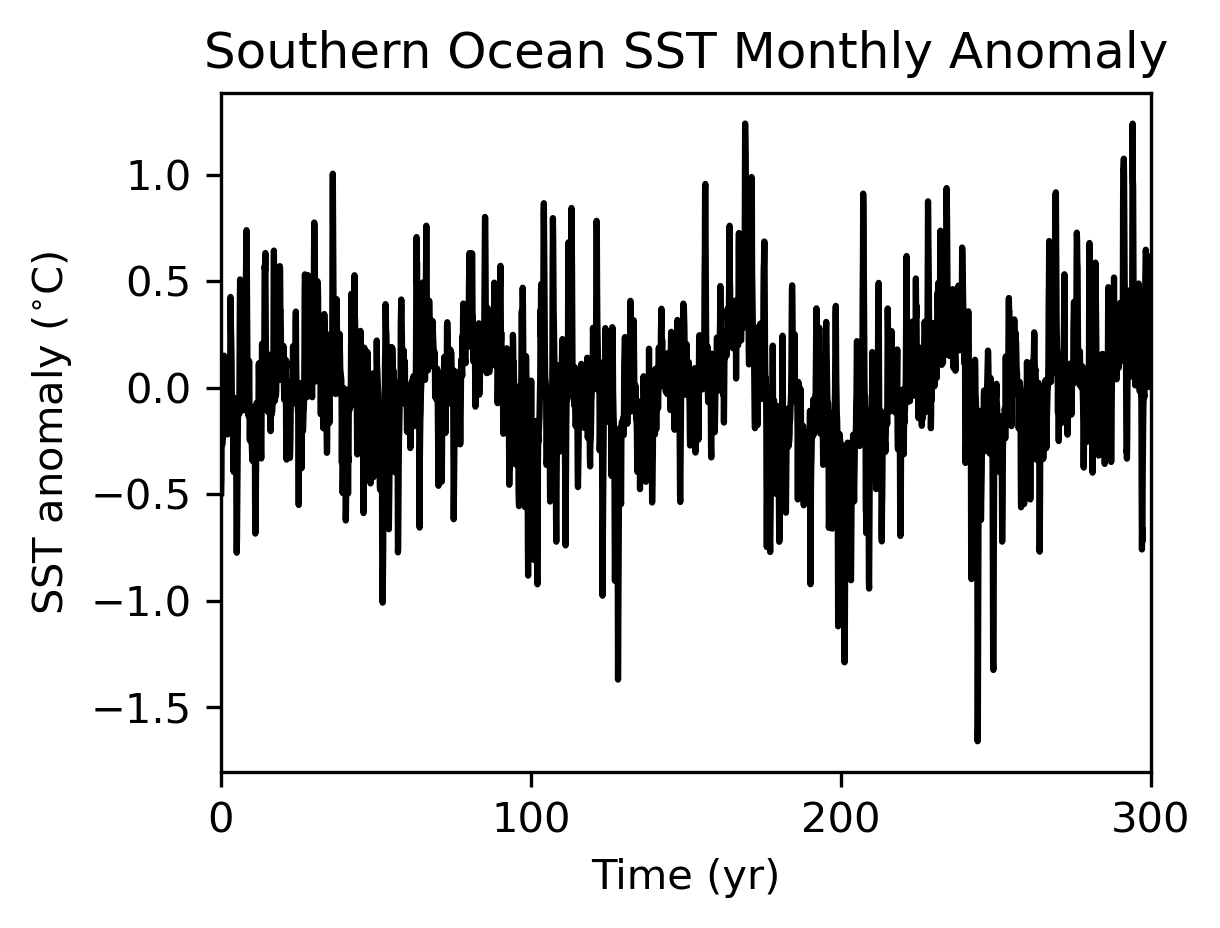

In [10]:
reg = 'SouthernOcean'
yrs = np.array([0,100,200,300])

fig,ax = plt.subplots(figsize=(4,3))

ax.plot(np.arange(1,3601), sst_anom[reg], color='black')
ax.set_xlim(1,3600)
ax.set(xlabel='Time (yr)', ylabel='SST anomaly ($^{\circ}$C)', xticks=yrs*12, xticklabels=yrs);
ax.set_title('Southern Ocean SST Monthly Anomaly');

Text(0.5, 1.0, 'Southern Ocean SST Monthly Variance')

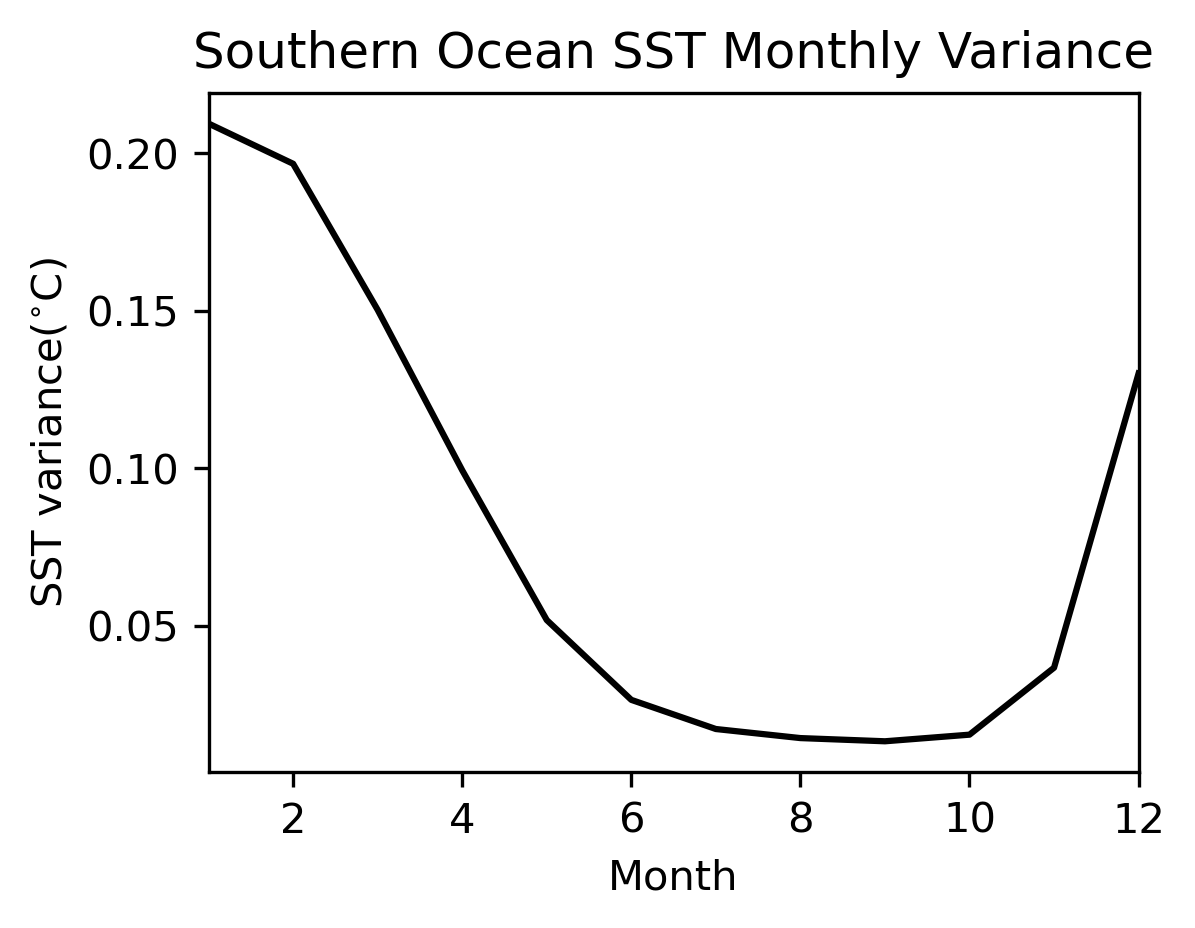

In [11]:
reg = 'SouthernOcean'

fig,ax = plt.subplots(figsize=(4,3))

ax.plot(np.arange(1,13), sst_var[reg], color='black')
ax.set_xlim(1,12)
ax.set(xlabel='Month', ylabel='SST variance($^{\circ}$C)');
ax.set_title('Southern Ocean SST Monthly ')

# 300-year Control with Ensembles Plots

In [12]:
def entire_ctrl_ens(var, reg, size=(8,4), ylim=None):
    
    if reg.lower() == 'global':
        ctrl = xr.open_dataset(writedir+'CTRL/'+var.upper()+'/'+var.lower()+'_ts_global_annual_mean.nc')['Global']
        ens = xr.open_dataset(writedir+var.upper()+'_ENSEMBLE/'+var.lower()+'_ens_global_annual_mean.nc')['Global']
    
    else:
        ctrl = xr.open_dataset(writedir+'CTRL/'+var.upper()+'/'+var.lower()+'_ts_so_annual_mean.nc')[reg]
        ens = xr.open_dataset(writedir+var.upper()+'_ENSEMBLE/'+var.lower()+'_ens_so_annual_mean.nc')[reg]

#     color = 'red'
#     if reg.lower() != 'global' and reg.lower() != 'southernocean':
#         reg_masks = xr.open_dataset(write_rootdir+'regional_global_masks.nc')
#         cmap = ['black', 'red', 'blue', 'green', 'orange', 'magenta']
#         color = cmap[list(reg_masks.data_vars).index(reg)]
    
    ens_yrs = np.array([22,64,106,170,232,295])

    fig,ax = plt.subplots(figsize=size)
    ax.plot(np.arange(1,301), ctrl, color='k');

    for nS in range(6):
        yr = int(str(ens['nStart'][nS].values).split('_')[0][1:])
        for e in range(40):
            if var.lower() == 'sst':
                ax.plot(yr+np.arange(10), ens[nS,e]-273.15, color='red', linewidth=0.75)
            else:
                ax.plot(yr+np.arange(10), ens[nS,e], color='red', linewidth=0.75)

    ax.set(xlim=[1,304], xticks=ens_yrs, xticklabels=ens_yrs, xlabel='Time (yr)');
    ax.set(ylim=ylim)
    ax.set_title(reg+' Mean '+var.upper())
    
    return fig,ax

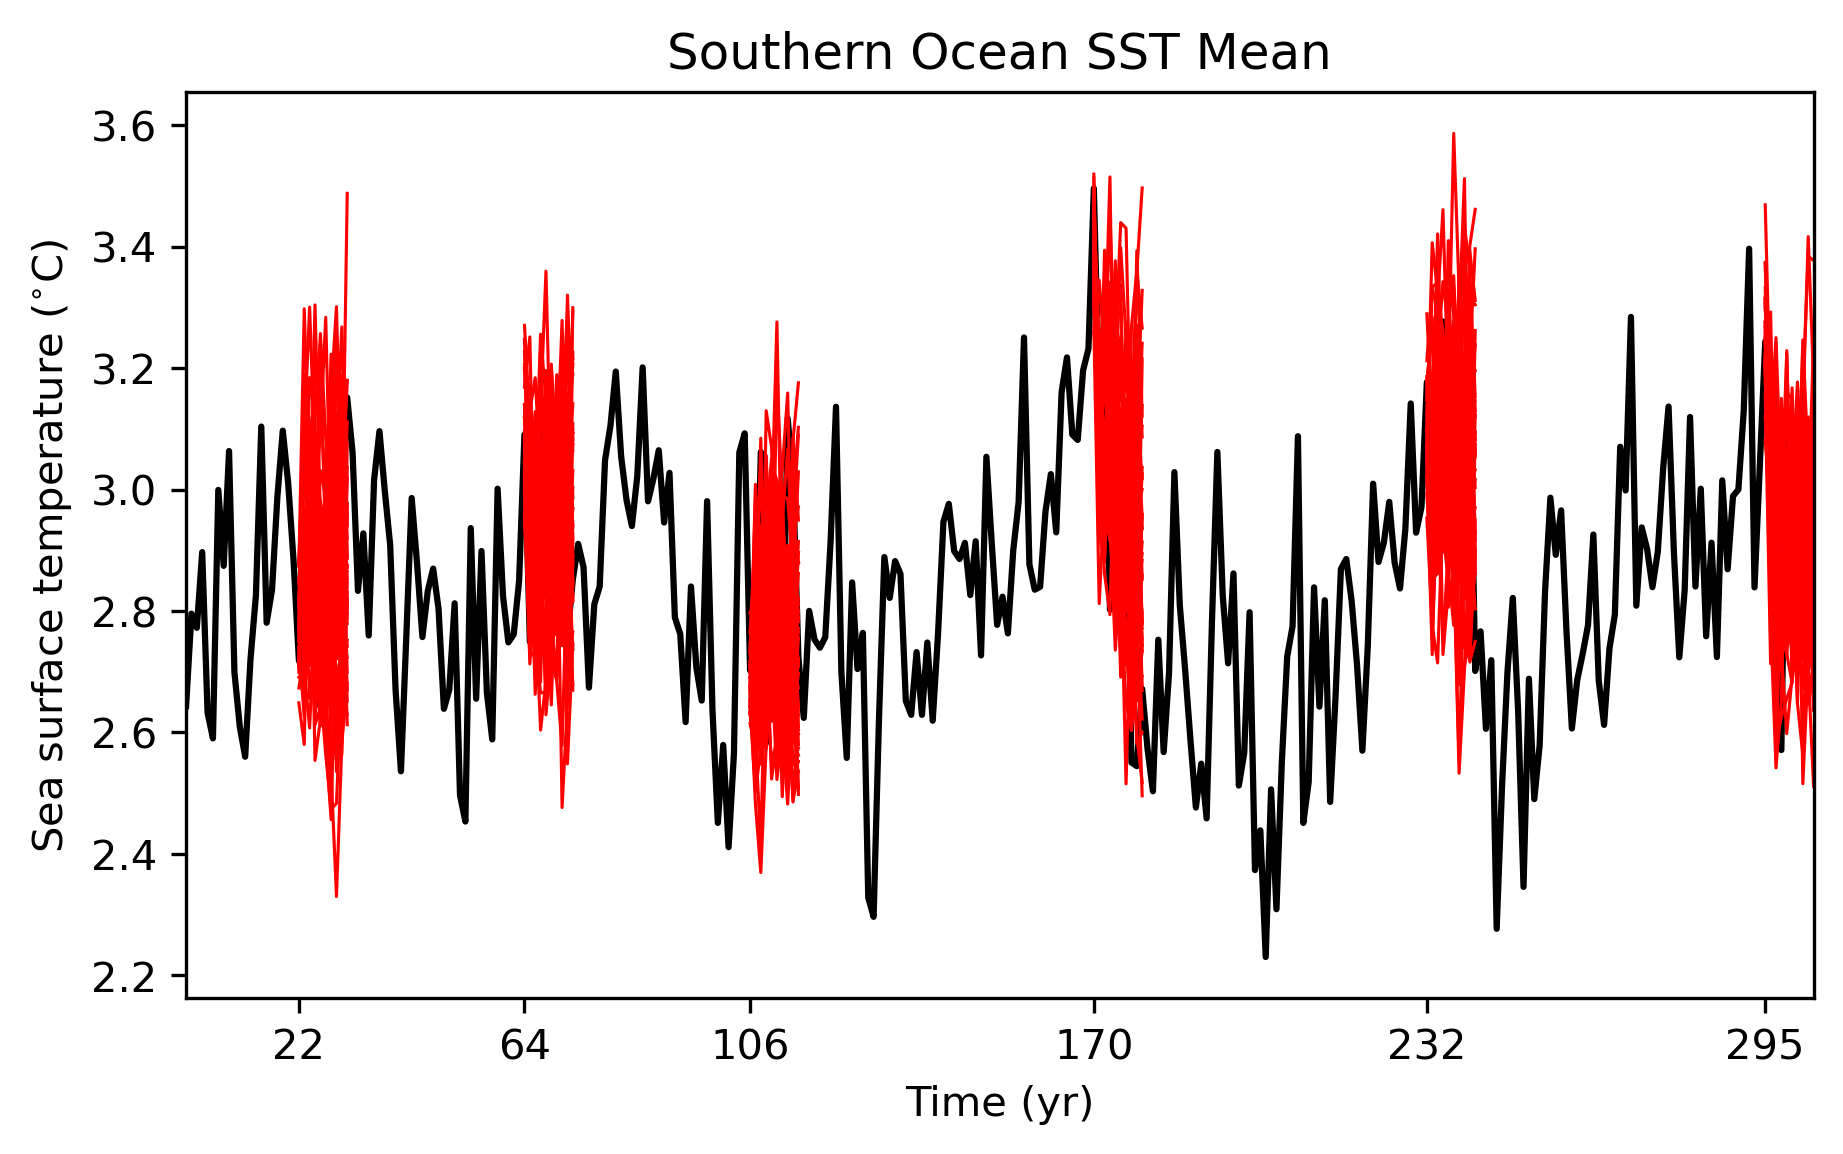

In [13]:
fig,ax = entire_ctrl_ens('sst', 'SouthernOcean', size=(7,4))
ax.set(title='Southern Ocean SST Mean', ylabel='Sea surface temperature ($^{\circ}$C)');

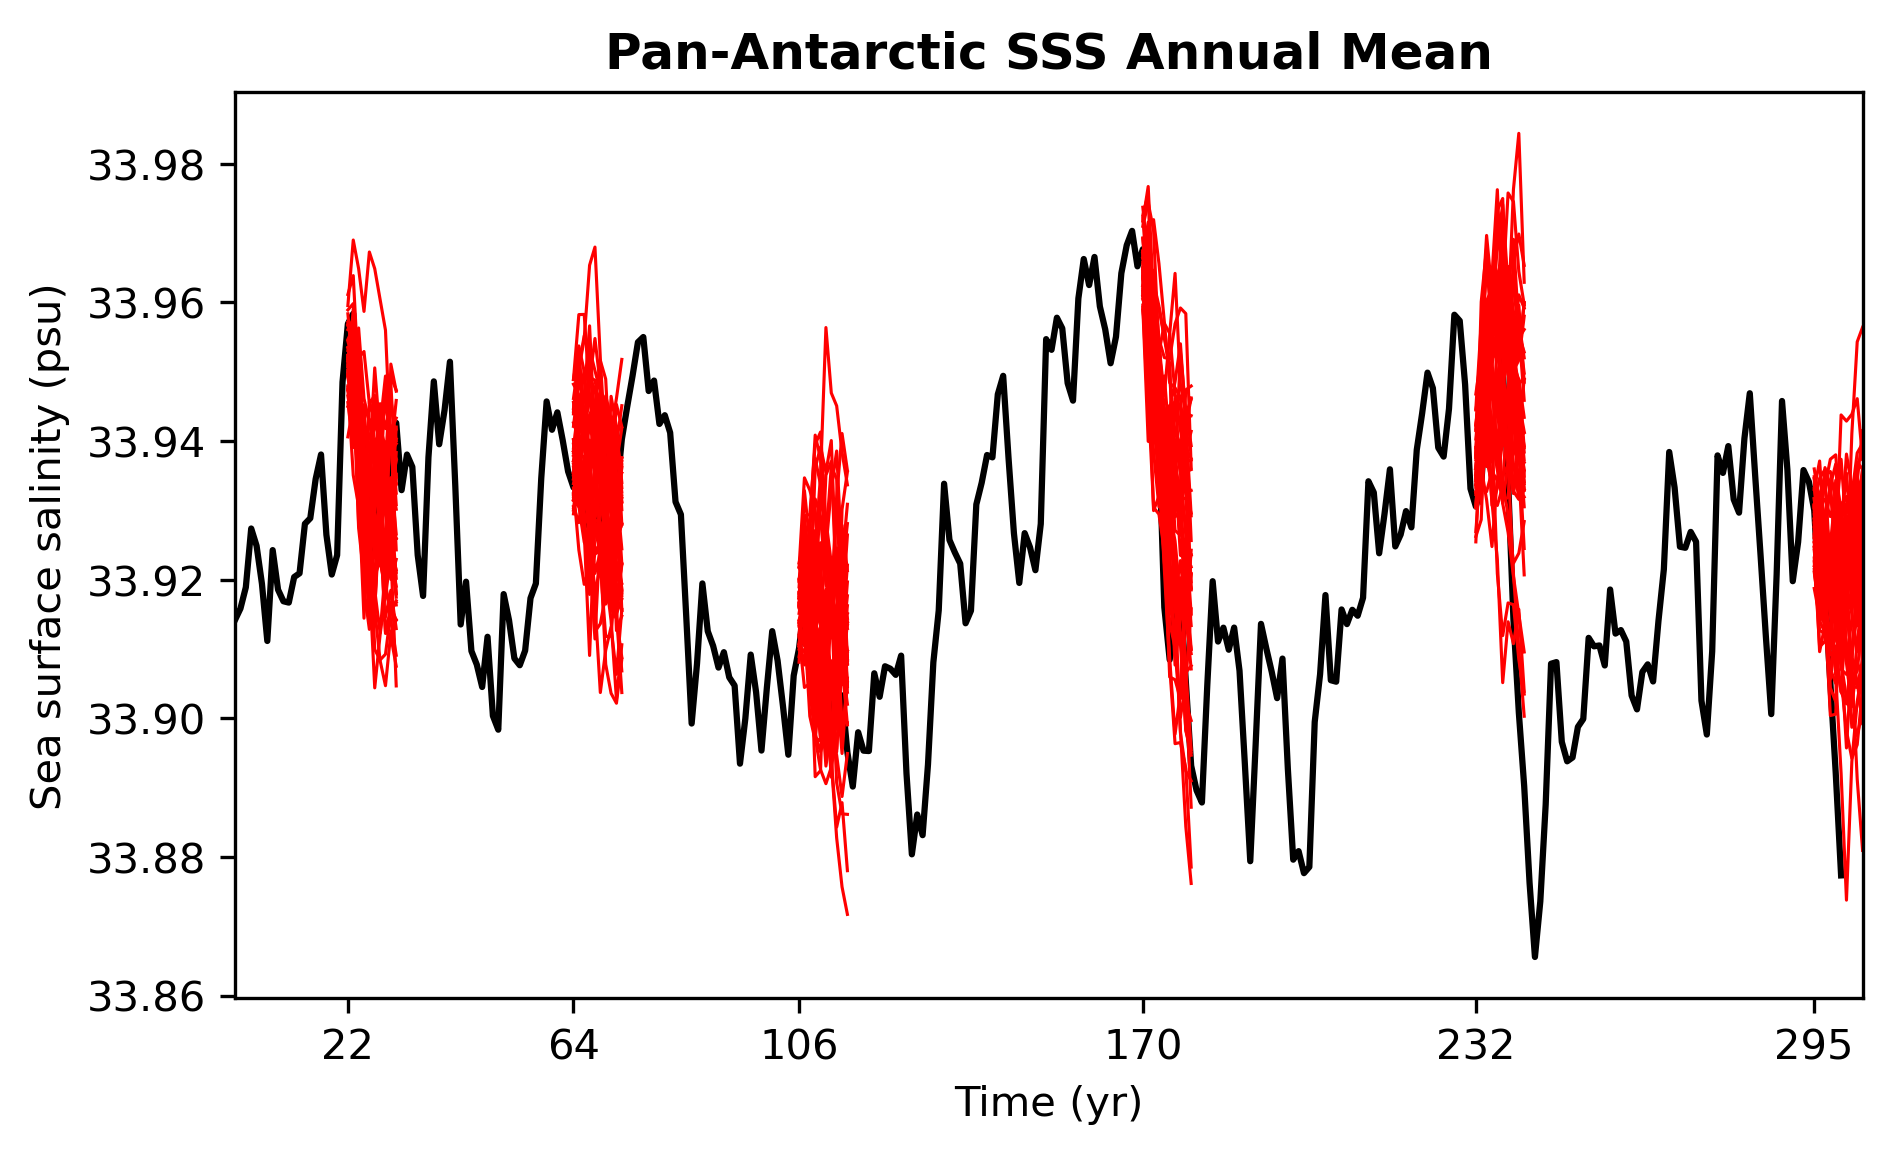

In [27]:
fig,ax = entire_ctrl_ens('sss', 'SouthernOcean', size=(7,4))
ax.set_title('Pan-Antarctic SSS Annual Mean', fontweight='bold')
ax.set(ylabel='Sea surface salinity (psu)');

(45.0, 520.0)


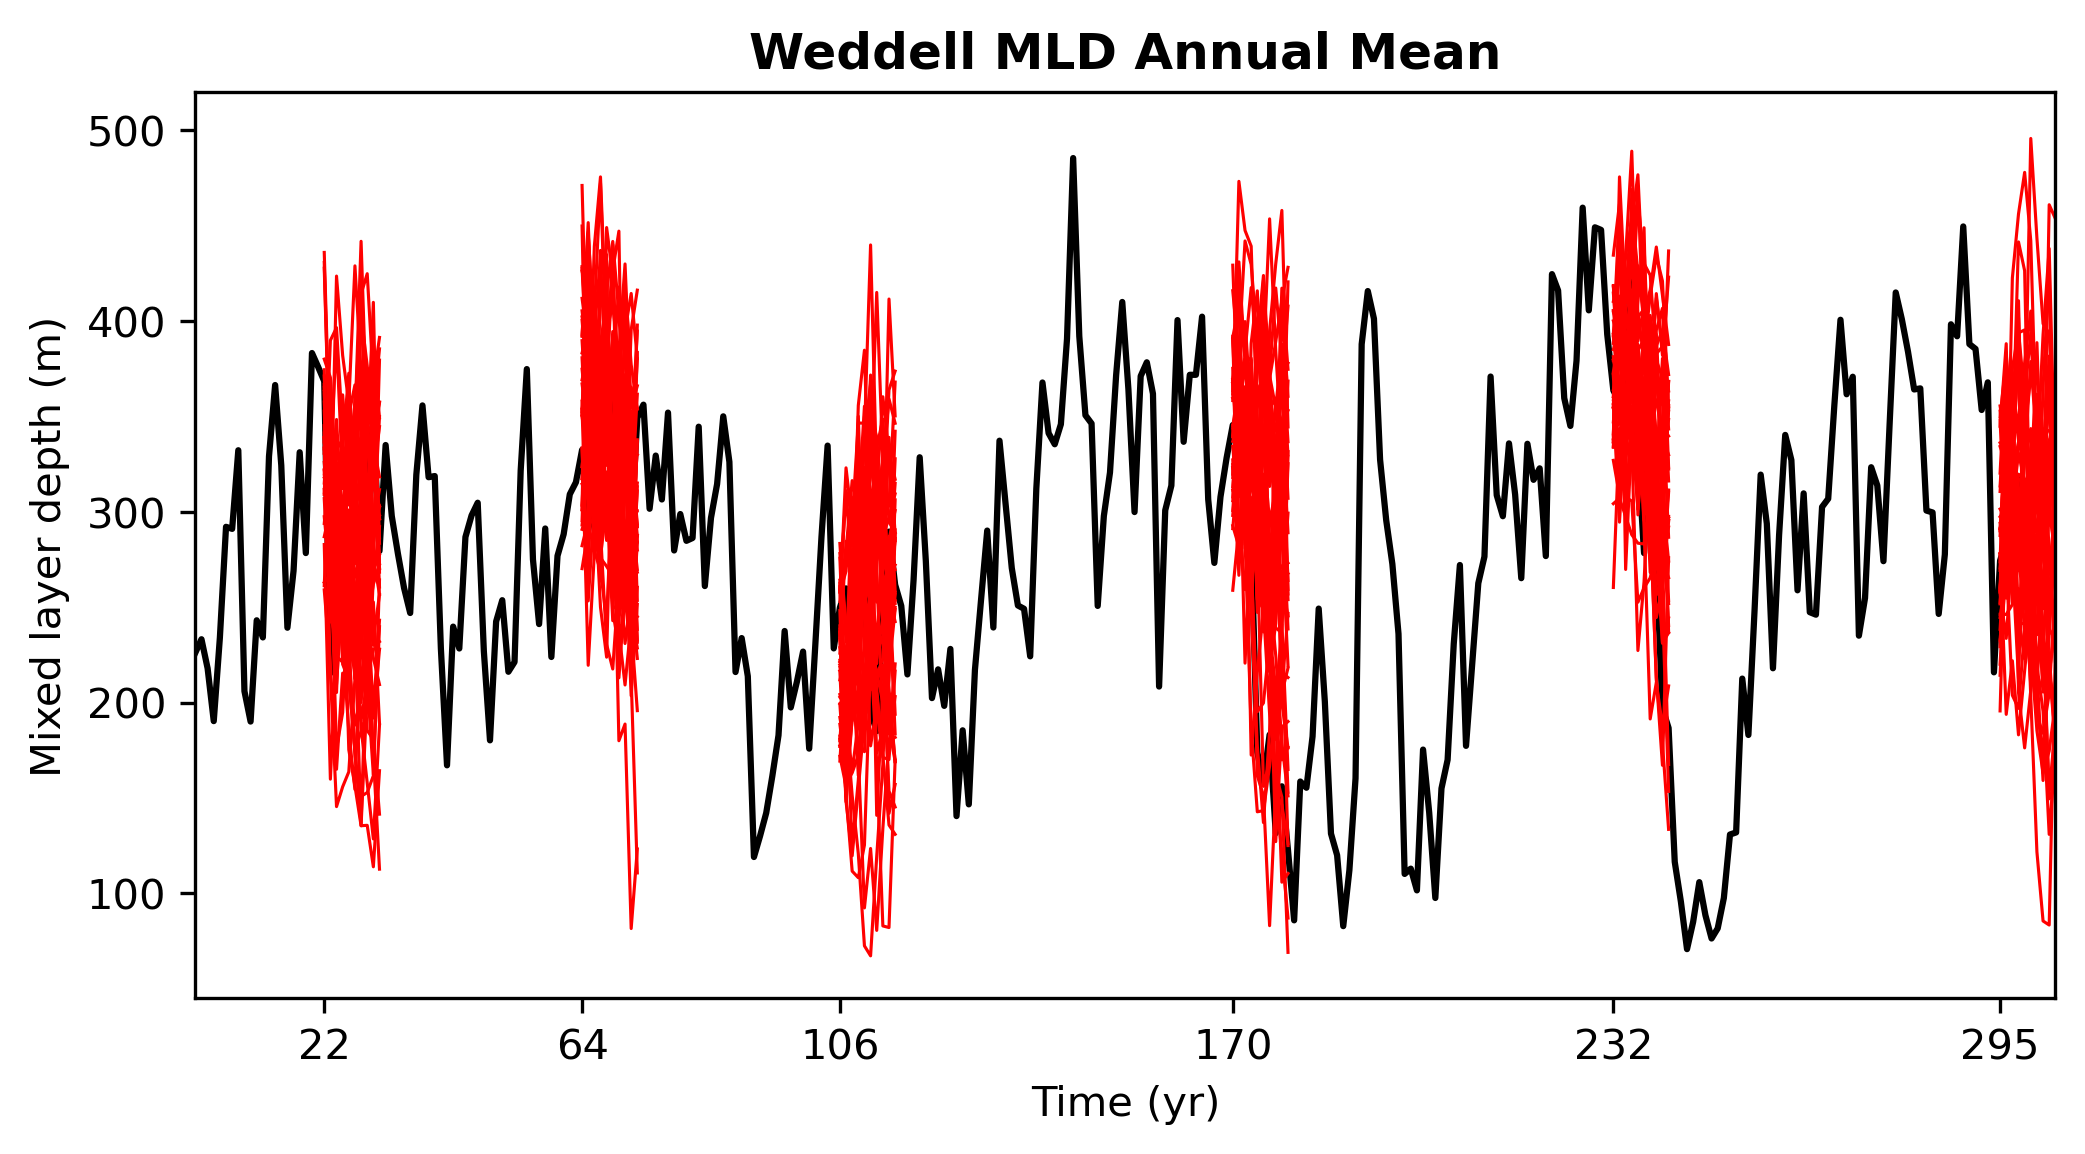

In [24]:
file = open('/home/bbuchovecky/storage/so_predict_derived/plotting_dicts.pkl','rb')
plotting_dicts = pkl.load(file)
file.close()

reg_names = plotting_dicts['reg_names']
var_su_names = plotting_dicts['var_su_names']
var_lu_names = plotting_dicts['var_lu_names']
var_ll_names = plotting_dicts['var_ll_names']
abbrv_month_names = plotting_dicts['abbrv_month_names']
reg_colors = plotting_dicts['reg_colors']

reg = 'Weddell'

fig,ax = entire_ctrl_ens('mld', reg, ylim=[45,520])
ax.set_ylabel('Mixed layer depth (m)');
ax.set_title(reg_names[reg]+' MLD Annual Mean', fontweight='bold');
print(ax.get_ylim())

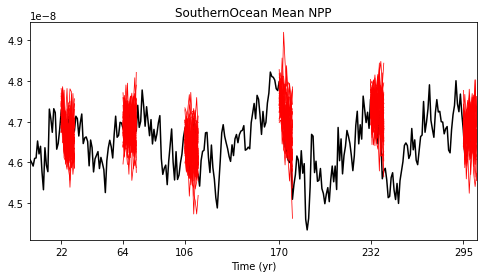

In [19]:
fig,ax = entire_ctrl_ens('npp', 'SouthernOcean')

# Divergence Plots

In [20]:
num_plots = 1

In [10]:
def div_ens_plot(var, reg, iS, size=(7,4), loc='lower left'):
    ens_yrs = np.array([170,22,64,106,232,295])

    if reg.lower() == 'global':
        ctrl = xr.open_dataset(writedir+'CTRL/'+var.upper()+'/'+var.lower()+'_ts_global_monthly_anom.nc')['Global']
        if iS == 5:
            ctrl = ctrl.isel(month=np.arange((ens_yrs[iS]-1)*12, ((ens_yrs[iS]-1)*12)+60))
        else:
            ctrl = ctrl.isel(month=np.arange((ens_yrs[iS]-1)*12, ((ens_yrs[iS]-1)*12)+120))
        ens = xr.open_dataset(writedir+var.upper()+'_ENSEMBLE/'+var.lower()+'_ens_global_monthly_anom.nc')['Global']
    
    else:
        ctrl = xr.open_dataset(writedir+'CTRL/'+var.upper()+'/'+var.lower()+'_ts_so_monthly_anom.nc')[reg]
        if iS == 5:
            ctrl = ctrl.isel(month=np.arange((ens_yrs[iS]-1)*12, ((ens_yrs[iS]-1)*12)+60))
        else:
            ctrl = ctrl.isel(month=np.arange((ens_yrs[iS]-1)*12, ((ens_yrs[iS]-1)*12)+120))
        ens = xr.open_dataset(writedir+var.upper()+'_ENSEMBLE/'+var.lower()+'_ens_so_monthly_anom.nc')[reg]
        
    fig,ax = plt.subplots(figsize=size)

    ## plot ensemble members
    for e in range(40):
        if e == 0:
            ax.plot(ens['nT'], ens[iS,e], color='red', linewidth=0.75, label='Ensemble Members')
        else:
            ax.plot(ens['nT'], ens[iS,e], color='red', linewidth=0.75)
        
    ## plot control
    ax.plot(np.arange(1,ctrl.size+1), ctrl, color='k', label='Control')
    
    ## highlight summer region - Dec,Jan,Feb,Mar
#     for m in np.arange(-1,120,12):
#         if m < 0:
#             ax.axvspan(m, m+4, alpha=0.25, color='gray', label='Months D J F M')
#         else:
#             ax.axvspan(m, m+4, alpha=0.25, color='gray')

    ylim = abs(np.array(ax.get_ylim())).max()
    ax.set(xlim=[1,120], ylim=[-ylim,ylim], xticks=[1,60,120], xticklabels=[ens_yrs[iS], ens_yrs[iS]+5, ens_yrs[iS]+10]);
    ax.set(xlabel='Time (yr)', title=var.upper()+' ENS'+f'{iS+1:02}');
    
    leg = ax.legend(loc=loc);
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    
    return fig,ax

## SST

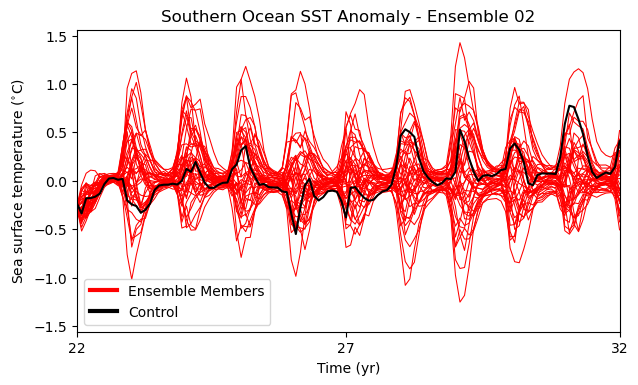

In [10]:
for i in [1]:
    fig,ax = div_ens_plot('sst', 'SouthernOcean', i)
    ax.set_ylabel('Sea surface temperature ($^{\circ}$C)')
    ax.set_title('Southern Ocean SST Anomaly - Ensemble '+f'{i+1:02}')

## SSS

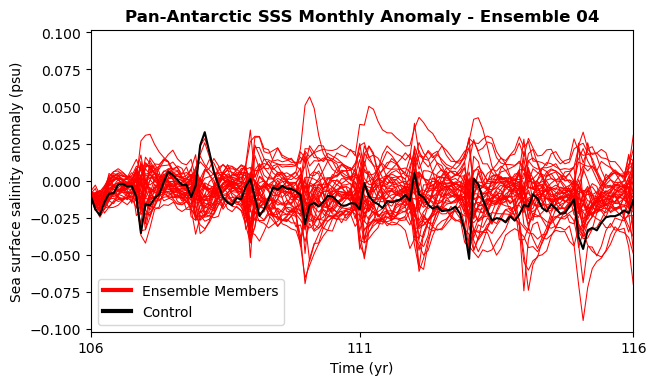

In [11]:
for i in range(3,4):
    fig,ax = div_ens_plot('sss', 'SouthernOcean', i)
    ax.set_ylabel('Sea surface salinity anomaly (psu)')
    ax.set_title('Pan-Antarctic SSS Monthly Anomaly - Ensemble '+f'{i+1:02}', fontweight='bold')

## NPP

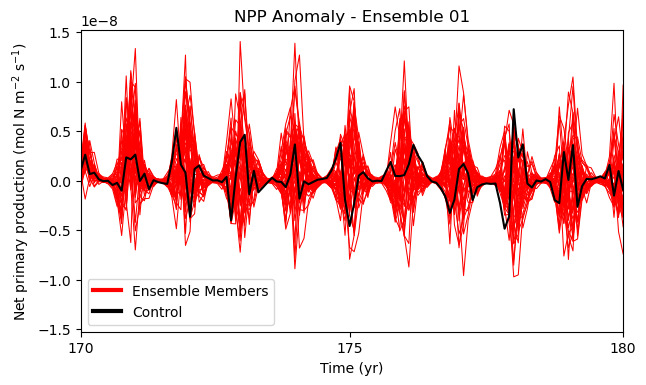

In [13]:
for i in range(1):
    fig,ax = div_ens_plot('npp', 'Ross', i)
    ax.set_ylabel('Net primary production (mol N m$^{-2}$ s$^{-1}$)')
    ax.set_title('NPP Anomaly - Ensemble '+f'{i+1:02}')

## MLD

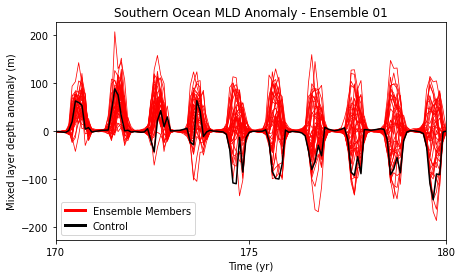

In [25]:
for i in range(1):
    fig,ax = div_ens_plot('mld', 'SouthernOcean', i)
    ax.set_ylabel('Mixed layer depth anomaly (m)')
    ax.set_title('Southern Ocean MLD Anomaly - Ensemble '+f'{i+1:02}')

## PCO2SURF

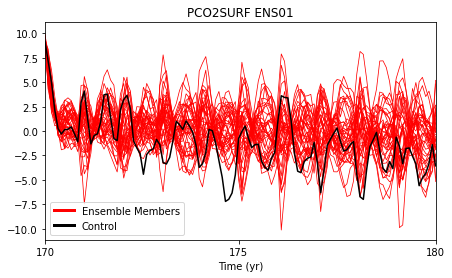

In [26]:
for i in range(num_plots):
    fig,ax = div_ens_plot('pco2surf', 'SouthernOcean', i)

## CN_INV

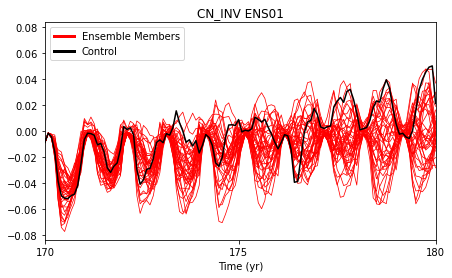

In [27]:
for i in range(1):
    fig,ax = div_ens_plot('cn_inv', 'SouthernOcean', i, loc='upper left')

## SIE

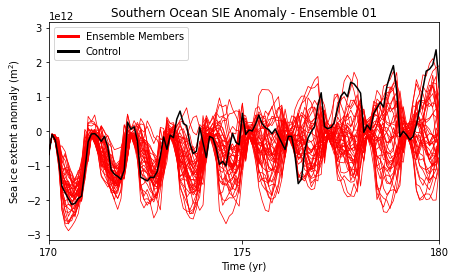

In [28]:
for i in range(1):
    fig,ax = div_ens_plot('sie', 'SouthernOcean', i, loc='upper left')
    ax.set_ylabel('Sea ice extent anomaly (m$^{2}$)')
    ax.set_title('Southern Ocean SIE Anomaly - Ensemble '+f'{i+1:02}')

## SIV

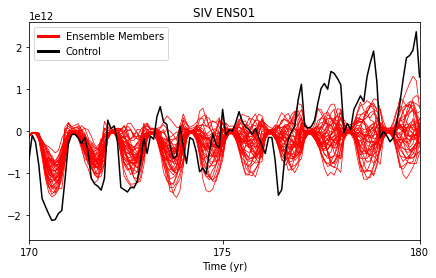

In [29]:
for i in range(1):
    fig,ax = div_ens_plot('siv', 'SouthernOcean', i, loc='upper left')

# Variance Plots

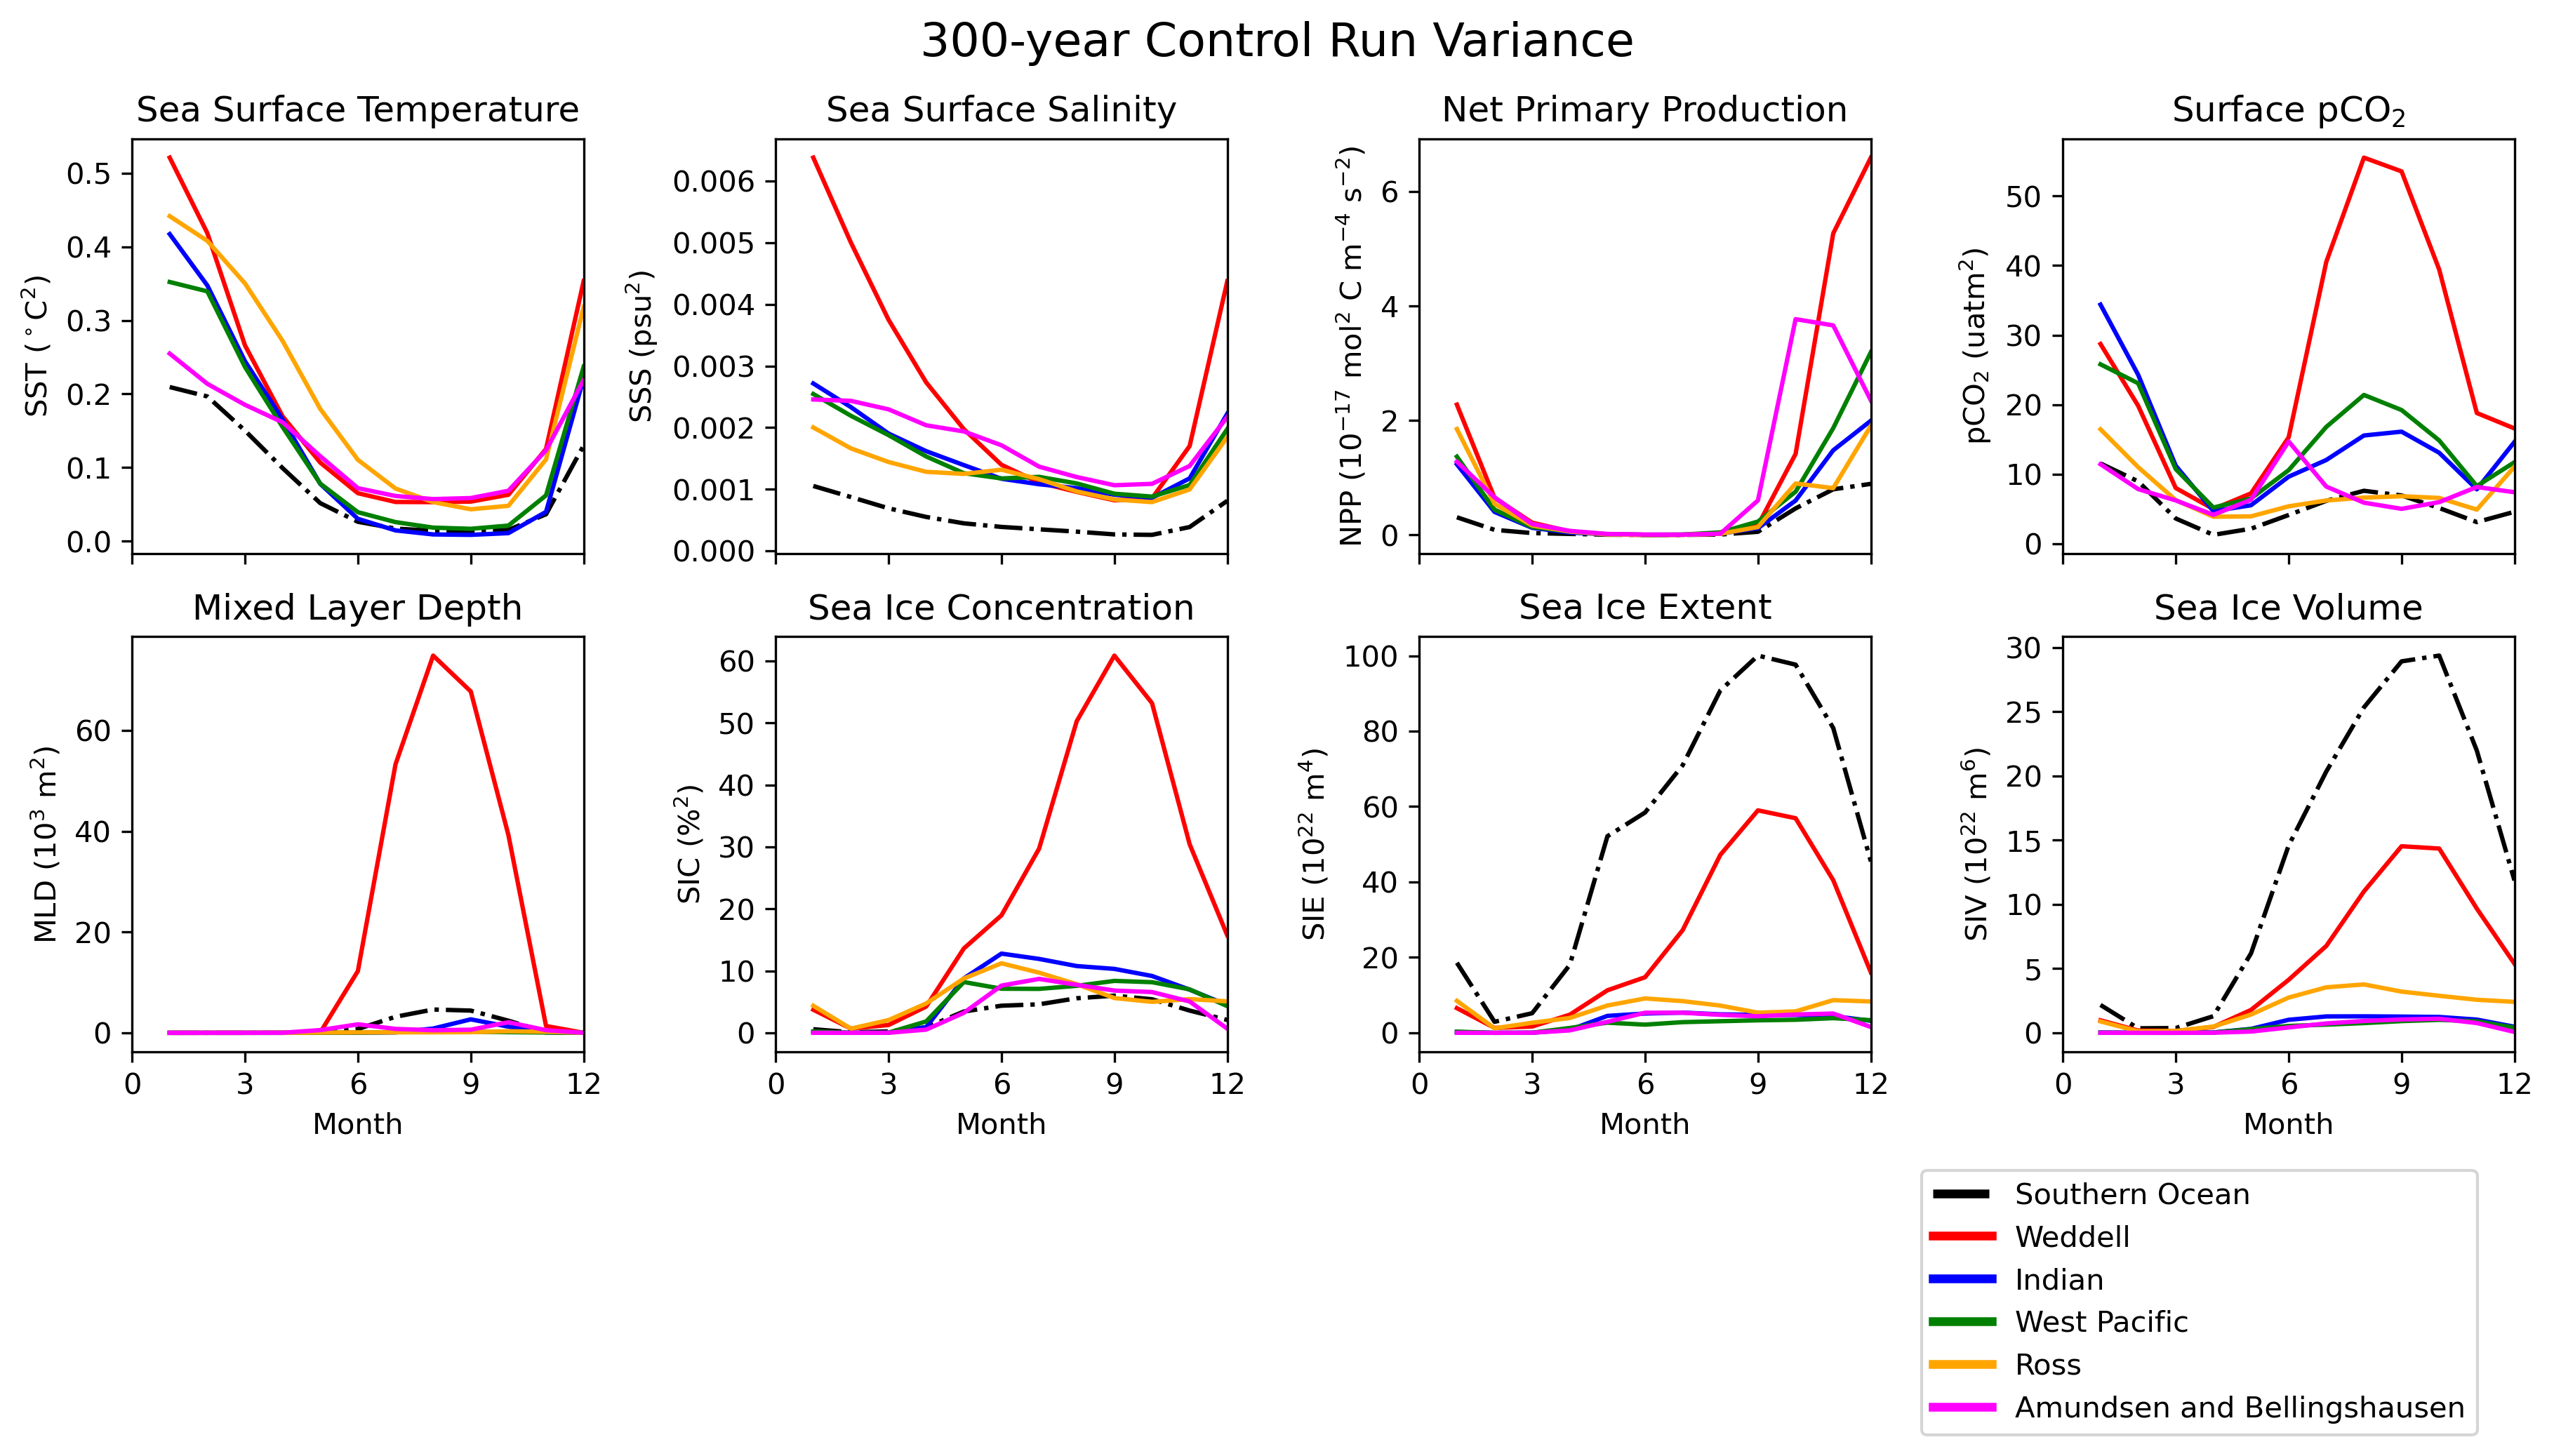

In [16]:
# mpl.rcParams['figure.dpi']= 400
reg_masks = xr.open_dataset(writedir+'regional_global_masks.nc')

size = (12,7)

fig,axes = plt.subplots(2, 4, figsize=size, sharex=True)

xlim=[2,12]
cmap = ['black', 'red', 'blue', 'green', 'orange', 'magenta']

all_data = [sst_so_monthly_var, sss_so_monthly_var, npp_so_monthly_var*1e17,
           pco2_so_monthly_var, mld_so_monthly_var/1000, cn_so_monthly_var*10000,
           sie_so_monthly_var/1e22,siv_so_monthly_var/1e22]

for f in range(8):
    for (reg,i) in zip(reg_masks.data_vars, range(6)):
        if reg == 'SouthernOcean':
            axes[int(f/4),f%4].plot(all_data[f]['month'], all_data[f][reg], color=cmap[i], label=reg_masks[reg].attrs['long_name'], ls='-.')
            axes[int(f/4),f%4].set(xlim=xlim, title=all_data[f].name.split('_')[0])
        
        else:
            axes[int(f/4),f%4].plot(all_data[f]['month'], all_data[f][reg], color=cmap[i], label=reg_masks[reg].attrs['long_name'])
            axes[int(f/4),f%4].set(xlim=xlim, title=all_data[f].name.split('_')[0], xticks=[0,3,6,9,12])
                  
        if int(f/4) == 1:
            axes[int(f/4),f%4].set(xlabel='Month')

axes[0,0].set(title='Sea Surface Temperature', ylabel='SST ($^\circ$C$^2$)');
axes[0,1].set(title='Sea Surface Salinity', ylabel='SSS (psu$^2$)');
axes[0,2].set(title='Net Primary Production', ylabel='NPP (10$^{-17}$ mol$^{2}$ C m$^{-4}$ s$^{-2}$)');
axes[0,3].set(title='Surface pCO$_2$', ylabel='pCO$_2$ (uatm$^2$)');
axes[1,0].set(title='Mixed Layer Depth', ylabel='MLD (10$^{3}$ m$^2$)');
axes[1,1].set(title='Sea Ice Concentration', ylabel='SIC (%$^2$)');
axes[1,2].set(title='Sea Ice Extent', ylabel='SIE (10$^{22}$ m$^4$)');
axes[1,3].set(title='Sea Ice Volume', ylabel='SIV (10$^{22}$ m$^6$)');

leg = axes[1,3].legend(bbox_to_anchor = (0.95, -0.25));
for line in leg.get_lines():
    line.set_linewidth(3.0)

fig.suptitle('300-year Control Run Variance', fontsize=16);

fig.tight_layout(pad=0.25)
fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(top=0.90)

# Std Dev Plots

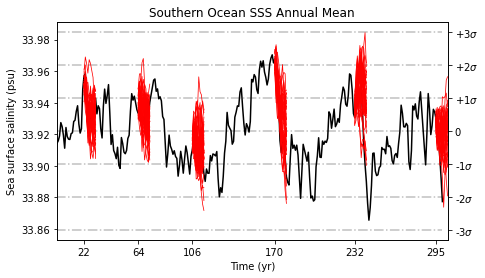

In [45]:
fig,ax = vis.stdev_plot(sss_so_annual_mean, 'SouthernOcean', size=(7,4));
ax.set_title('Southern Ocean SSS Annual Mean');



ens = xr.open_dataset(writedir+'SSS_ENSEMBLE/sss_ens_so_annual_mean.nc')['SouthernOcean']   
ens_yrs = np.array([22,64,106,170,232,295])

for nS in range(6):
    yr = int(str(ens['nStart'][nS].values).split('_')[0][1:])
    for e in range(40):
        ax.plot(yr+np.arange(10), ens[nS,e], color='red', linewidth=0.75)

ax.set(xlim=[1,304], xticks=ens_yrs, xticklabels=ens_yrs, xlabel='Time (yr)');

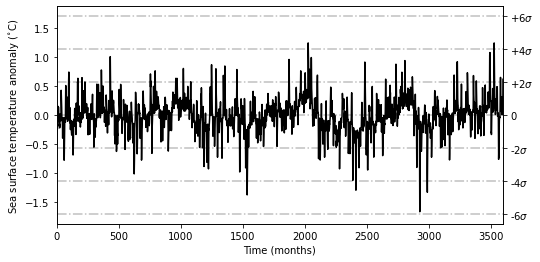

In [46]:
fig,ax = vis.stdev_plot(sst_so_monthly_anom, 'SouthernOcean', size=(8,4));
ax.set_title('');

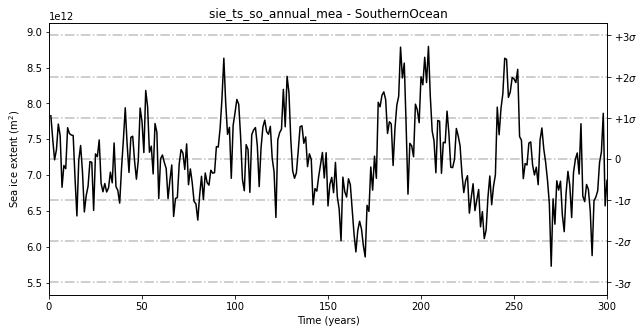

In [47]:
vis.stdev_plot(sie_so_annual_mean, 'SouthernOcean');

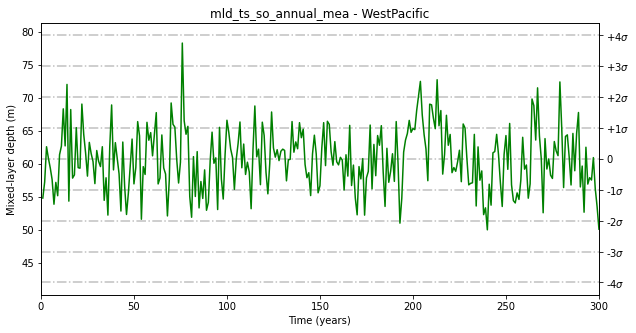

In [48]:
vis.stdev_plot(mld_so_annual_mean, 'WestPacific');

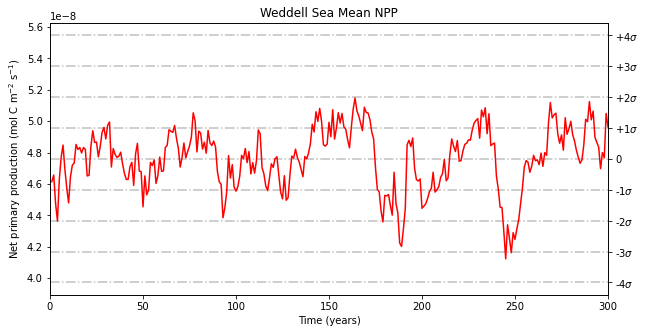

In [49]:
fig,ax = vis.stdev_plot(npp_so_annual_mean, 'Weddell');
ax.set_ylabel('Net primary production (mol C m$^{-2}$ s$^{-1}$)');
ax.set_title('Weddell Sea Mean NPP');

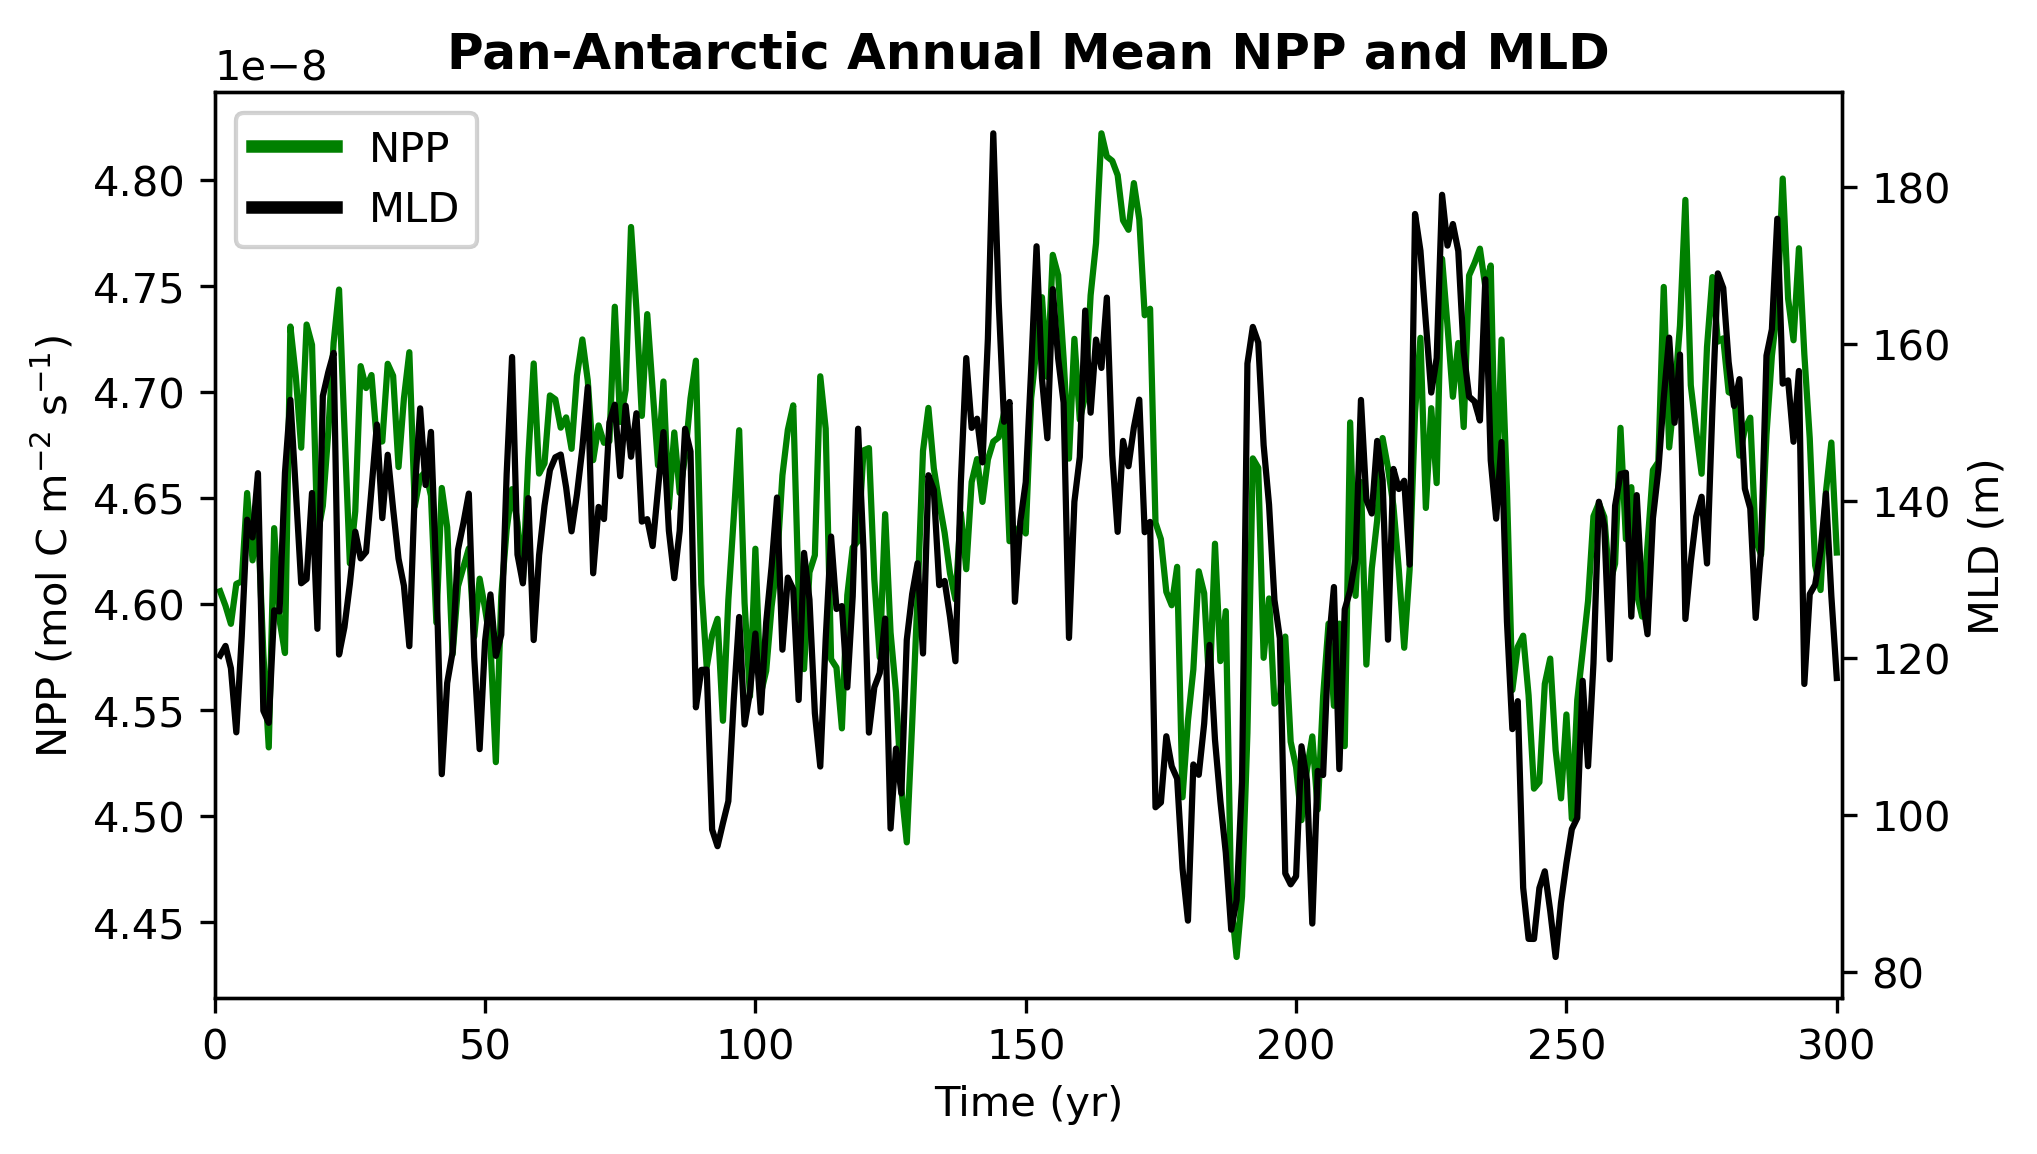

In [16]:
reg = 'SouthernOcean'

fig,ax1 = plt.subplots(figsize=(7,4))
ax2 = ax1.twinx()

ax1.plot(npp_so_annual_mean['year'], npp_so_annual_mean[reg], color='green', label='NPP')
ax1.set_ylabel('NPP (mol C m$^{-2}$ s$^{-1}$)')

# ax2.plot(sie_so_annual_mean['year'], sie_so_annual_mean[reg], color='blue', label='SIE')
# ax2.set_ylabel('SIE (m$^{2}$)')

ax2.plot(mld_so_annual_mean['year'], mld_so_annual_mean[reg], color='black', label='MLD')
ax2.set_ylabel('MLD (m)')

fig.legend(loc='upper left', bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)
ax1.set_xlim(0,301);
ax1.set_xlabel('Time (yr)');
ax1.set_title('Pan-Antarctic Annual Mean NPP and MLD', fontweight='bold');

leg = fig.legend(loc='upper left', bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes);
for line in leg.get_lines():
    line.set_linewidth(3.0)

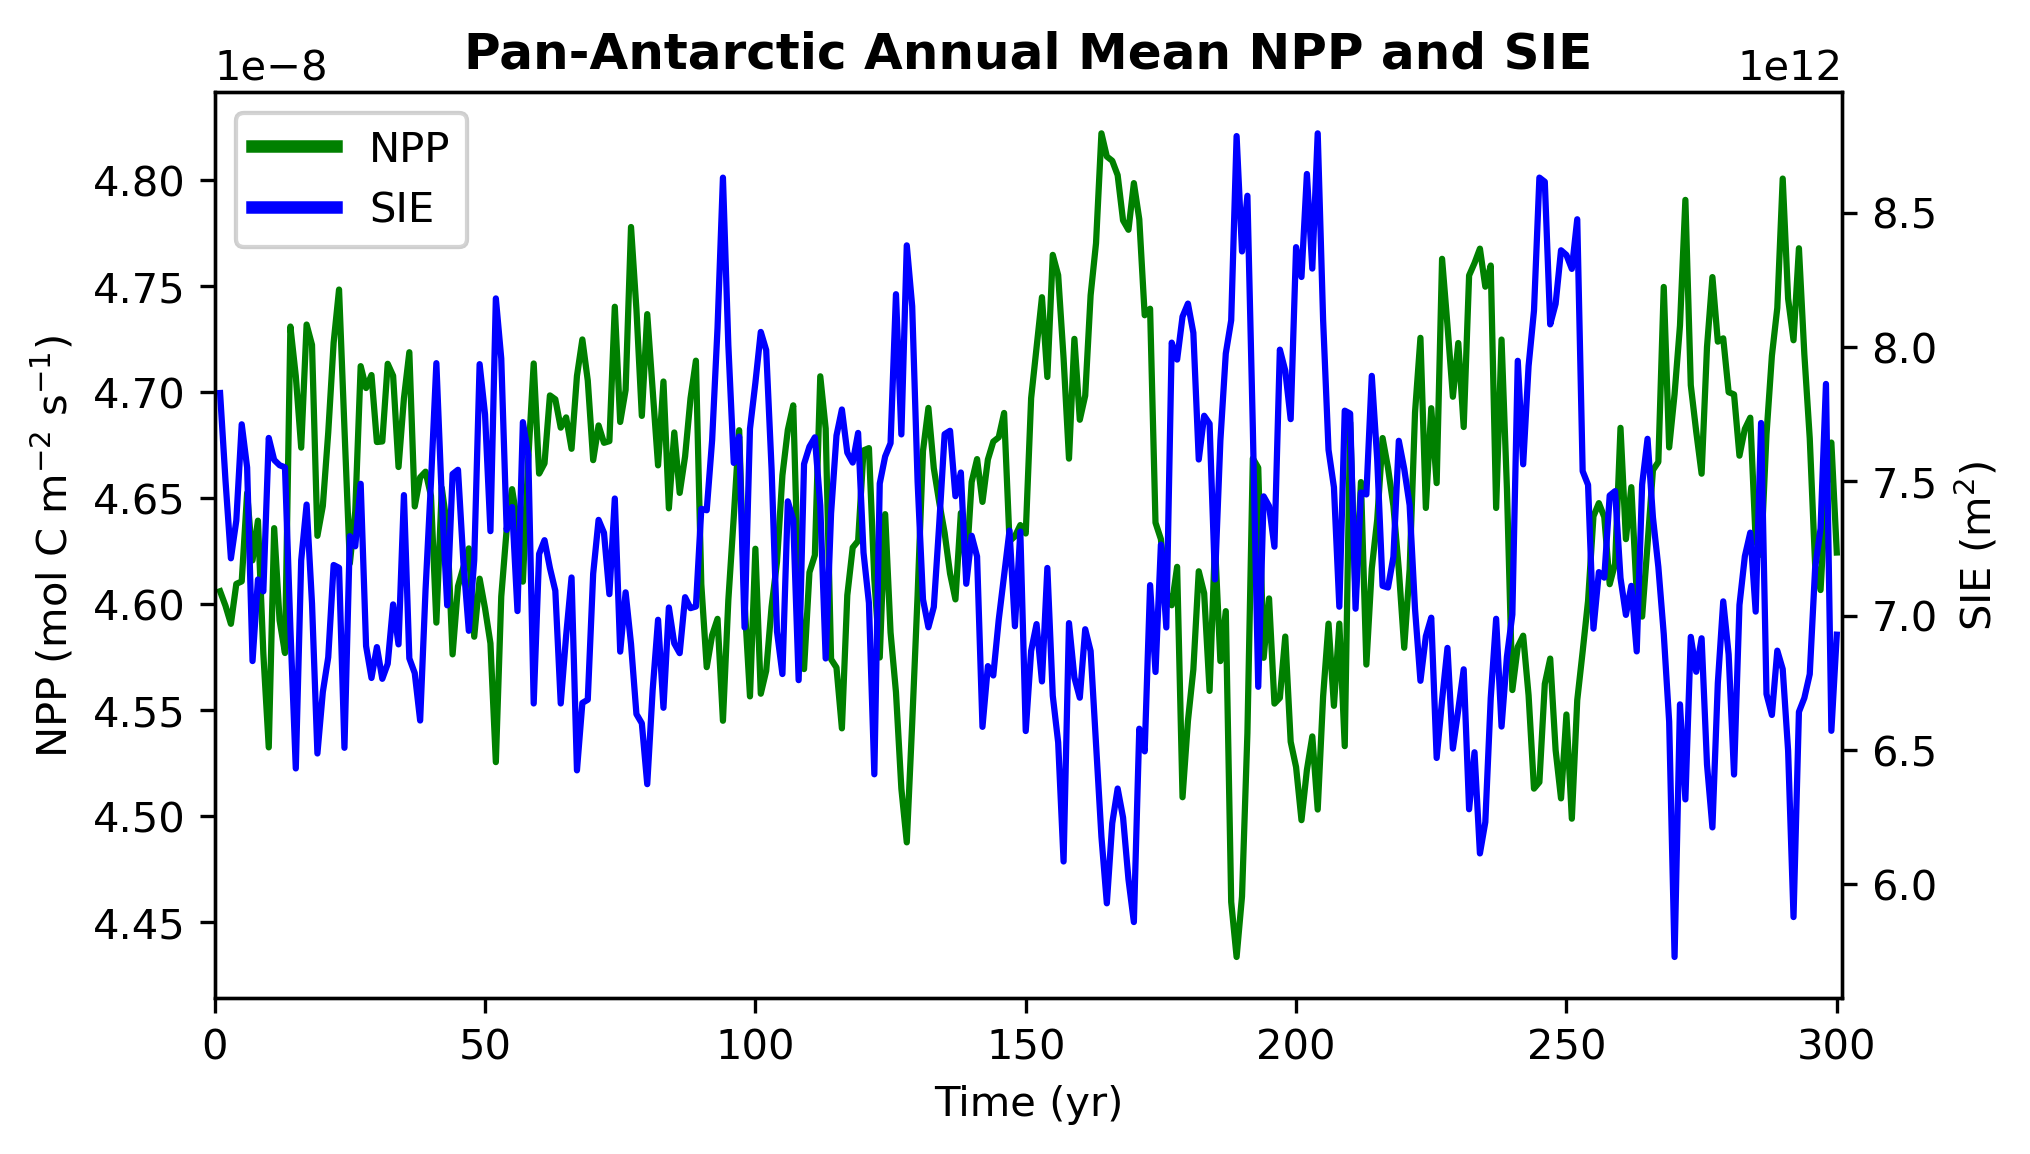

In [19]:
reg = 'SouthernOcean'

fig,ax1 = plt.subplots(figsize=(7,4))
ax2 = ax1.twinx()

ax1.plot(npp_so_annual_mean['year'], npp_so_annual_mean[reg], color='green', label='NPP')
ax1.set_ylabel('NPP (mol C m$^{-2}$ s$^{-1}$)')

ax2.plot(sie_so_annual_mean['year'], sie_so_annual_mean[reg], color='blue', label='SIE')
ax2.set_ylabel('SIE (m$^{2}$)')

# ax2.plot(mld_so_annual_mean['year'], mld_so_annual_mean[reg], color='black', label='MLD')
# ax2.set_ylabel('MLD (m)')

fig.legend(loc='upper left', bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)
ax1.set_xlim(0,301);
ax1.set_xlabel('Time (yr)');
ax1.set_title('Pan-Antarctic Annual Mean NPP and SIE', fontweight='bold');

leg = fig.legend(loc='upper left', bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes);
for line in leg.get_lines():
    line.set_linewidth(3.0)

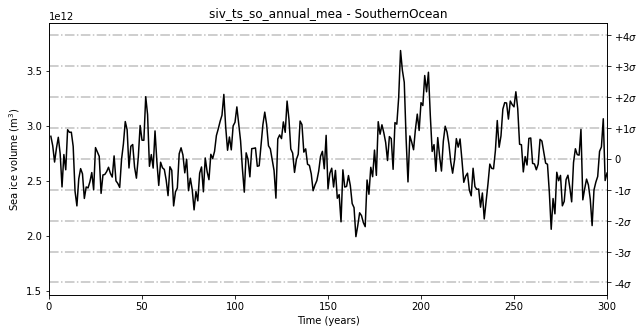

In [51]:
vis.stdev_plot(siv_so_annual_mean, 'SouthernOcean');

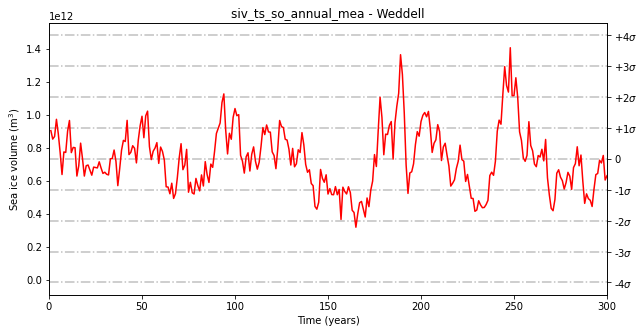

In [52]:
vis.stdev_plot(siv_so_annual_mean, 'Weddell');

# Spatial Plots (+ Animation?)

In [53]:
pcs.dir_inspect(writedir+'CTRL/MLD')

['mld_gc_global_monthly_anom.nc',
 'mld_gc_global_monthly_mean.nc',
 'mld_gc_global_monthly_var.nc',
 'mld_gc_so_monthly_anom.nc',
 'mld_gc_so_monthly_mean.nc',
 'mld_gc_so_monthly_var.nc',
 'mld_ts_global_annual_mean.nc',
 'mld_ts_global_monthly_anom.nc',
 'mld_ts_global_monthly_mean.nc',
 'mld_ts_global_monthly_var.nc',
 'mld_ts_so_annual_mean.nc',
 'mld_ts_so_monthly_anom.nc',
 'mld_ts_so_monthly_mean.nc',
 'mld_ts_so_monthly_var.nc']

In [54]:
ds = xr.open_dataset(writedir+'CTRL/MLD/mld_gc_so_monthly_var.nc')['mld_variance']

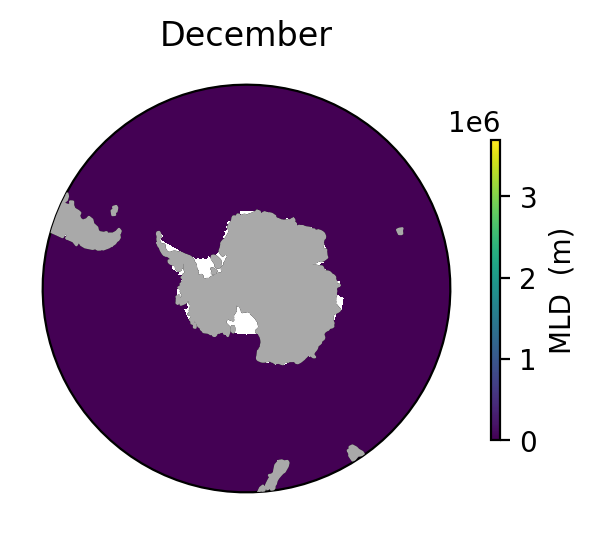

In [55]:
## adapted from https://cosima-recipes.readthedocs.io/en/latest/tutorials/Making_Maps_with_Cartopy.html

from celluloid import Camera
import matplotlib.path as mpath
import cmocean as cm
from IPython.display import HTML

fig = plt.figure(figsize=(3,3), dpi=200)
ax = plt.axes(projection=ccrs.SouthPolarStereo())

months = ['January', 'February', 'March', 'April', 'May',
          'June', 'July', 'August', 'September', 'October',
          'November', 'December']

camera = Camera(fig)

vmin = 0
vmax = ds.max()

## create circular boundary
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.45
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

for m in [11]:
    p = ds[m].plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False, x='xt_ocean', y='yt_ocean', vmin=vmin, vmax=vmax)

    ax.coastlines();
    ax.add_feature(cfeature.LAND, zorder=10, facecolor='darkgray');
    ax.set_title('');
    
    ax.set_title(months[m])
    ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
    cb = plt.colorbar(p,cax=ax_cb, orientation='vertical')
    cb.ax.set_ylabel('MLD  (m)');

    camera.snap()

In [56]:
animation = camera.animate()
HTML(animation.to_html5_video())

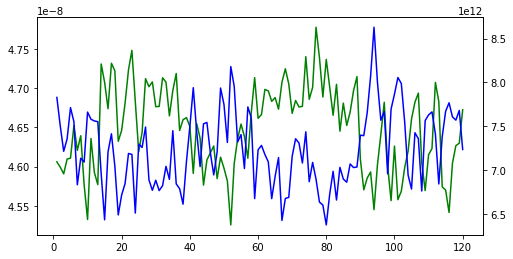

In [60]:
fig,ax1 = plt.subplots(figsize=(8,4))
ax2 = ax1.twinx()

ax1.plot(np.arange(1,121), npp_so_annual_mean['SouthernOcean'][0:120], color='green')
ax2.plot(np.arange(1,121), sie_so_annual_mean['SouthernOcean'][0:120], color='blue')

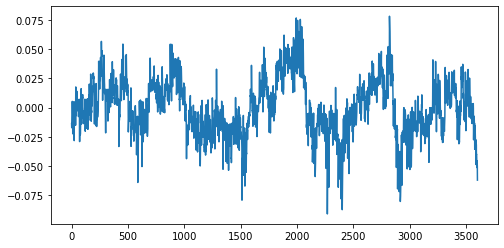

In [58]:
fig,ax = plt.subplots(figsize=(8,4))

ax.plot(sss_so_monthly_anom['month'], sss_so_monthly_anom['SouthernOcean'])